In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import pearsonr

In [12]:
results_dir = '/Users/owenrogers/PycharmProjects/MDRFEP/data/grid_search_results'

In [13]:
run_of_interest = 'softrep__min__5'

In [31]:
mdrfep_output = os.path.join(results_dir, f'for_plotting_{run_of_interest}.sc')

In [32]:
os.path.exists(mdrfep_output)

True

In [33]:
df = pd.read_csv(mdrfep_output)

In [34]:
print(df.columns)

Index(['ssm_parent', 'dg_fold', 'dg_fold_lb', 'dg_fold_ub', 'monomer_dg',
       'dimer_dg', 'ddg', 'delta_exp_ddg_lb', 'delta_exp_ddg_center',
       'delta_exp_ddg_ub', 'ssm_seqpos', 'ssm_letter', 'delta_rosetta_lb',
       'delta_rosetta_ub', 'is_interface_core', 'is_interface_boundary',
       'is_monomer_core', 'is_monomer_boundary', 'is_monomer_surface',
       'ddg_monomer', 'ddg_rosetta'],
      dtype='object')


In [41]:
print(df['ddg_monomer'].values.min())
print(df['ddg_monomer'].values.max())

-0.1321057188955757
7.90879311834123


In [42]:
bins = [-1, 1, 3, 5, 7, 9]

In [43]:
df['bin'] = pd.cut(df['ddg_monomer'], bins=bins)

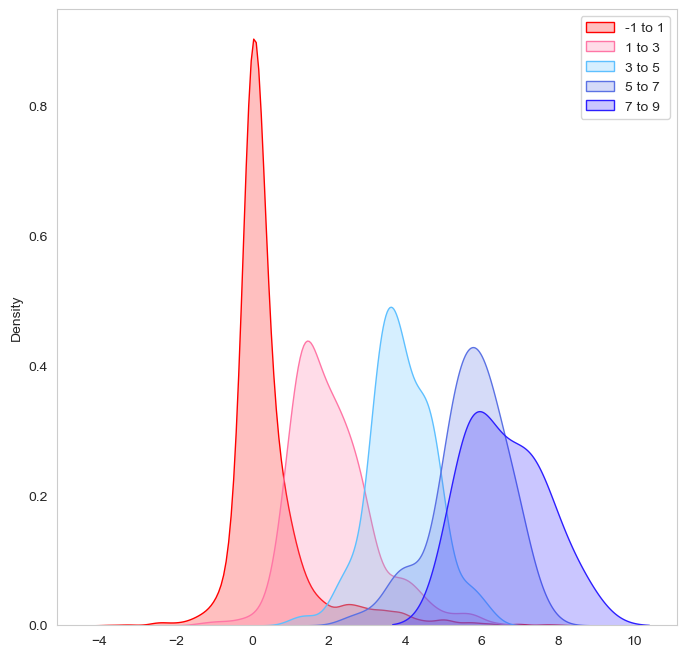

In [60]:
_, ax = plt.subplots(figsize=(8, 8))

sns.kdeplot(df[df['bin'] == pd.Interval(-1, 1, closed='right')]['ddg_rosetta'].values, ax=ax, label='-1 to 1', color='#ff0000', fill=True)
sns.kdeplot(df[df['bin'] == pd.Interval(1, 3, closed='right')]['ddg_rosetta'].values, ax=ax, label='1 to 3', color='#ff76a6', fill=True)
sns.kdeplot(df[df['bin'] == pd.Interval(3, 5, closed='right')]['ddg_rosetta'].values, ax=ax, label='3 to 5', color='#5ec0ff', fill=True)
sns.kdeplot(df[df['bin'] == pd.Interval(5, 7, closed='right')]['ddg_rosetta'].values, ax=ax, label='5 to 7', color='#5b72e4', fill=True)
sns.kdeplot(df[df['bin'] == pd.Interval(7, 9, closed='right')]['ddg_rosetta'].values, ax=ax, label='7 to 9', color='#2d1fff', fill=True)

plt.legend()
plt.grid(False)
plt.show()

In [112]:
correlations = []

In [113]:
x_stabilities = np.sort(df['ddg_monomer'].unique()).clip(0, None)

In [114]:
for x0 in x_stabilities:
    
    subset = df[df['ddg_monomer'] < x0]
    
    if len(subset) > 2:
        corr = pearsonr(subset['ddg_rosetta'], subset['delta_exp_ddg_center'])
    else:
        corr = np.nan
        
    try:
        correlations.append(corr.statistic)
    except:
        correlations.append(corr)

In [115]:
print(len(x_stabilities))
print(len(correlations))

4204
4204


In [116]:
plot_df = pd.DataFrame({'ddg_monomer': x_stabilities, 'correlation': correlations})

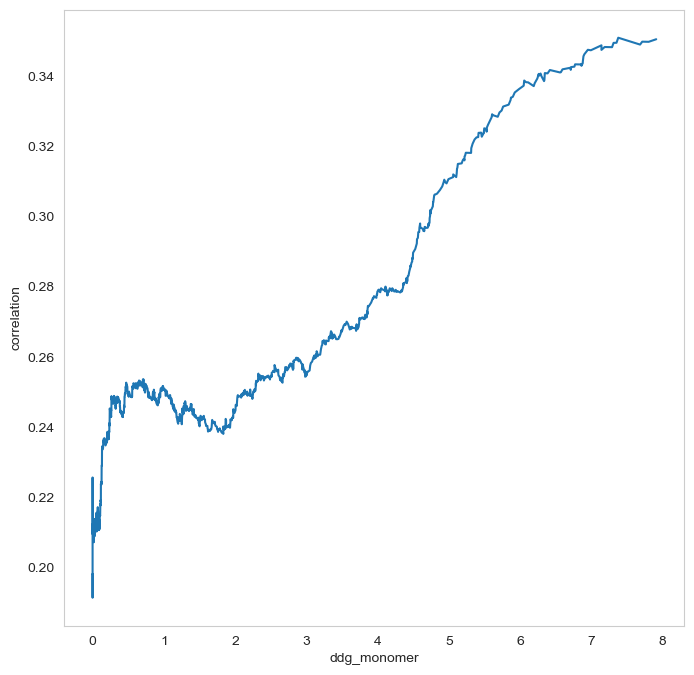

In [117]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.lineplot(data=plot_df, x='ddg_monomer', y='correlation', ax=ax)
plt.grid(False)

plt.show()